### PSTH plot on water response

In [1]:
%matplotlib inline

In [125]:
import os;
os.chdir('/home/gergely/code/analysis/analysis-scripts/')
import sys;
import copy;

import cPickle as pickle;

import pandas as pd;

import numpy as np;
import scipy.stats as stats;

import matplotlib;
matplotlib.use("pdf");
matplotlib.style.use('classic')


import matplotlib.pyplot as pp;
import matplotlib.backends.backend_pdf as pdf;
import matplotlib.gridspec as gs;

import seaborn as sns;

import lab;
import lab.analysis.imaging_analysis as ia;
import lab.analysis.behavior_analysis as ba;
import lab.analysis.reward_analysis as ra;

import lab.classes.exceptions as exc;

import lab.plotting.plotting_helpers as plotTools;

import VIP_common as vc;
matplotlib.rcParams['pdf.fonttype'] = 42;
matplotlib.rcParams['ps.fonttype'] = 42;

In [4]:
expSet=lab.ExperimentSet("raphe.sql");
mouseIDs=["gtr6_a1","gtr6_a3","gtr6_a4","gtr6_a5","gtr6_b1","gtr6_b2","gtr6_b3"];

In [5]:
hrExpGroups=vc.loadHRExpGrp(expSet, mouseIDs, minLicks=10);
rfExpGroups=vc.loadExptsByType(expSet, mouseIDs, "randomForaging", channel="Ch2");
# rtExpGroups=vc.loadExptsByType(expSet, mouseIDs, "runTraining", channel="Ch2");
ctxExpGroups=vc.loadExptsByType(expSet, mouseIDs, "contextDiscrimination", channel="Ch2")

In [6]:
imExpGroup=list(rfExpGroups["imaging"]);
imExpGroup.extend(list(ctxExpGroups["imaging"]))
imExpGroup.extend(list(hrExpGroups["imaging"]));
# imExpGroup.extend(list(rfExpGroups["imaging"]));
# imExpGroup.extend(list(orfExpGroups["imaging"]));
imExpGroup=lab.classes.ExperimentGroup(imExpGroup);

In [7]:
waterResponse = lab.analysis.imaging_analysis.PSTH(imExpGroup, "water", return_df=True)

In [8]:
print(len(imExpGroup))
print(waterResponse.columns)
print(waterResponse.size)
waterResponse.head(2)

81
Index([u'ROI', u'activity', u'expt', u'stimStart', u'stimulus', u'time'], dtype='object')
385890


,ROI,activity,expt,stimStart,stimulus,time
0,"([[< Trial: gtr6_b2, stimulus = , time = 2018...","[-0.0769806451676, -0.0767352327358, -0.079634...",[[]],1224,water,"[-4.968554, -4.935208, -4.901862, -4.868516, -..."
1,"([[< Trial: gtr6_b2, stimulus = , time = 2018...","[-0.0885280663452, -0.0904313171879, -0.075949...",[[]],1233,water,"[-4.968554, -4.935208, -4.901862, -4.868516, -..."


In [9]:
waterResponse["mouseID"]=map(lambda expt: expt.parent.get("mouseID"), waterResponse["expt"])
waterResponse["cROI"]=map(lambda roi: (roi[0].get("mouseID"), roi[1], roi[2]), waterResponse["ROI"])

In [9]:
# temp=waterResponse["ROI"].iloc[0]
# temp[0].__class__
# len(temp)
# print(temp[2])

In [74]:
waterResponseByRoi = waterResponse.groupby(["cROI"])
waterResponseByRoi.head(2)

,ROI,activity,expt,stimStart,stimulus,time,mouseID,cROI
0,"([[< Trial: gtr6_b1, stimulus = , time = 2018...","[-0.0272519844444, -0.0197831674791, -0.014033...",[[]],10386,water,"[-4.9827, -4.949482, -4.916264, -4.883046, -4....",gtr6_b1,"(gtr6_b1, , 1541510948800)"
1,"([[< Trial: gtr6_a5, stimulus = , time = 2018...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[[]],123,water,"[-4.968554, -4.935208, -4.901862, -4.868516, -...",gtr6_a5,"(gtr6_a5, , 1541472305140)"
2,"([[< Trial: gtr6_a5, stimulus = , time = 2018...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[[]],132,water,"[-4.968554, -4.935208, -4.901862, -4.868516, -...",gtr6_a5,"(gtr6_a5, , 1541472305140)"
171,"([[< Trial: gtr6_b3, stimulus = , time = 2018...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[[]],28,water,"[-4.968554, -4.935208, -4.901862, -4.868516, -...",gtr6_b3,"(gtr6_b3, , 1544215409810)"
172,"([[< Trial: gtr6_b3, stimulus = , time = 2018...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[[]],36,water,"[-4.968554, -4.935208, -4.901862, -4.868516, -...",gtr6_b3,"(gtr6_b3, , 1544215409810)"
364,"([[< Trial: gtr6_a5, stimulus = , time = 2018...","[-0.181302646476, -0.183243677726, -0.16234293...",[[]],453,water,"[-4.968554, -4.935208, -4.901862, -4.868516, -...",gtr6_a5,"(gtr6_a5, , 1544153074090)"
365,"([[< Trial: gtr6_a5, stimulus = , time = 2018...","[-0.0405221948778, -0.039257785828, -0.0467757...",[[]],463,water,"[-4.968554, -4.935208, -4.901862, -4.868516, -...",gtr6_a5,"(gtr6_a5, , 1544153074090)"
596,"([[< Trial: gtr6_b2, stimulus = , time = 2018...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[[]],273,water,"[-4.968554, -4.935208, -4.901862, -4.868516, -...",gtr6_b2,"(gtr6_b2, , 1544207706347)"
597,"([[< Trial: gtr6_b2, stimulus = , time = 2018...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[[]],283,water,"[-4.968554, -4.935208, -4.901862, -4.868516, -...",gtr6_b2,"(gtr6_b2, , 1544207706347)"
677,"([[< Trial: gtr6_b2, stimulus = , time = 2018...","[-0.119123617717, -0.108458647209, -0.10723663...",[[]],1470,water,"[-4.968554, -4.935208, -4.901862, -4.868516, -...",gtr6_b2,"(gtr6_b2, , 1544207533880)"


In [75]:
waterResponseByRoi.size()

cROI
(gtr6_a1, , 1540946742427)    164
(gtr6_a1, , 1540946755275)    164
(gtr6_a1, , 1540946764969)    164
(gtr6_a1, , 1540946776027)    164
(gtr6_a1, , 1540946789346)    164
(gtr6_a1, , 1540946807009)    164
(gtr6_a1, , 1540946867864)     84
(gtr6_a1, , 1540946882001)     84
(gtr6_a1, , 1540946901546)     84
(gtr6_a1, , 1540946932292)     84
(gtr6_a1, , 1540946942625)     84
(gtr6_a1, , 1540946968743)     84
(gtr6_a1, , 1540947017915)     84
(gtr6_a1, , 1540947036028)     84
(gtr6_a1, , 1540947080139)     84
(gtr6_a1, , 1540947092362)     84
(gtr6_a1, , 1540947114082)     84
(gtr6_a1, , 1540947194742)     84
(gtr6_a3, , 1541471178953)     20
(gtr6_a3, , 1541471243471)     20
(gtr6_a3, , 1541471543988)     55
(gtr6_a3, , 1541471650955)     55
(gtr6_a3, , 1541471821564)     55
(gtr6_a3, , 1543953790755)    100
(gtr6_a3, , 1543953955892)    100
(gtr6_a3, , 1543954051403)    100
(gtr6_a3, , 1543954676438)    100
(gtr6_a3, , 1544061370455)    100
(gtr6_a3, , 1544061575725)     40
(gtr6_a3,

In [10]:
psth = waterResponse.groupby(["mouseID", "cROI"]).apply(vc.aggregratePSTH, "activity", "time")

/home/gergely/anaconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/gergely/anaconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1202: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


In [11]:
print(psth.columns)
#print(psth.index)
print(len(psth))
print(type(psth))
psth.head(2)

Index([u'activityMean', u'activitySTD', u'numSamples', u'time'], dtype='object')
694
<class 'pandas.core.frame.DataFrame'>


activityMean  \
mouseID cROI                                                                              
gtr6_a1 (gtr6_a1, , 1540946742427) 0  [0.00514428819509, 0.00607838597092, 0.0063344...   
        (gtr6_a1, , 1540946755275) 0  [0.0165394977802, 0.0183256112321, 0.019487450...   

                                                                            activitySTD  \
mouseID cROI                                                                              
gtr6_a1 (gtr6_a1, , 1540946742427) 0  [0.0710270812012, 0.071108146981, 0.0707670373...   
        (gtr6_a1, , 1540946755275) 0  [0.0642501617169, 0.0666676785352, 0.068595970...   

                                      numSamples  \
mouseID cROI                                       
gtr6_a1 (gtr6_a1, , 1540946742427) 0         164   
        (gtr6_a1, , 1540946755275) 0         164   

                                                                                   time  
mouseID cROI                                                                             
gtr6_a1 (gtr6_a1, , 1540946742427) 0  [-4.9827, -4.949482, -4.916264, -4.883046, -4....  
        (gtr6_a1, , 1540946755275) 0  [-4.9827, -4.949482, -4.916264, -4.883046, -4....

In [ ]:
for time, trace in zip(psth["time"],psth["activityMean"]):
    pp.plot(time, trace)

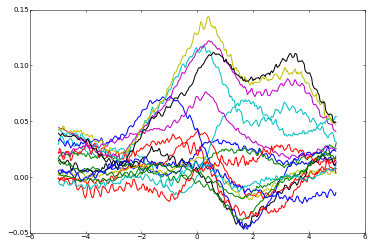

In [316]:
gtr6_a1 = psth.loc["gtr6_a1"]
for time, trace in zip(gtr6_a1["time"],gtr6_a1["activityMean"]):
    pp.plot(time, trace)

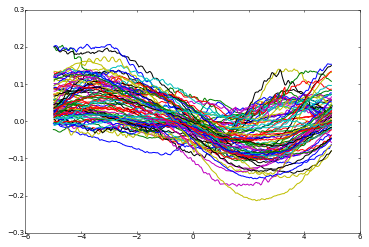

In [317]:
gtr6_a3 = psth.loc["gtr6_a3"]
for time, trace in zip(gtr6_a3["time"],gtr6_a3["activityMean"]):
    pp.plot(time, trace)

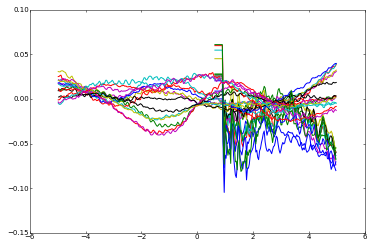

In [318]:
gtr6_a4 = psth.loc["gtr6_a4"]
for time, trace in zip(gtr6_a4["time"],gtr6_a4["activityMean"]):
    pp.plot(time, trace)

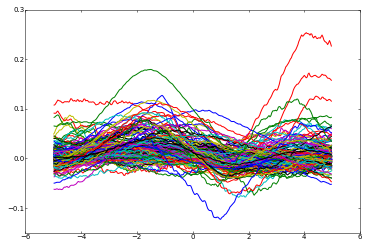

In [319]:
gtr6_a5 = psth.loc["gtr6_a5"]
for time, trace in zip(gtr6_a5["time"],gtr6_a5["activityMean"]):
    pp.plot(time, trace)

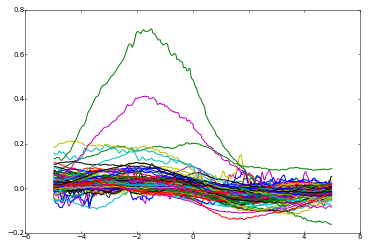

In [320]:
gtr6_b1 = psth.loc["gtr6_b1"]
for time, trace in zip(gtr6_b1["time"],gtr6_b1["activityMean"]):
    pp.plot(time, trace)

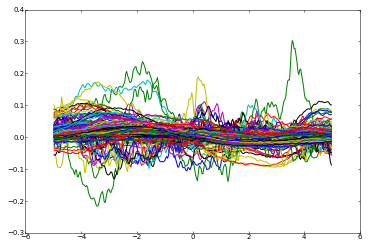

In [14]:
gtr6_b2 = psth.loc["gtr6_b2"]
for time, trace in zip(gtr6_b2["time"],gtr6_b2["activityMean"]):
    pp.plot(time, trace)

In [46]:
pages = pdf.PdfPages("/data/gergely/Summaries/_raphe/reward/gtr6_a1_allPSTH.pdf")
gtr6_b3 = psth.loc["gtr6_a1"]
fig=pp.figure(dpi=300)
for time, trace in zip(gtr6_a1["time"],gtr6_a1["activityMean"]):
    pp.plot(time, trace)
pages.savefig(fig)
pp.close(fig)
pages.close()

In [47]:
pages = pdf.PdfPages("/data/gergely/Summaries/_raphe/reward/gtr6_a3_allPSTH.pdf")
gtr6_a3 = psth.loc["gtr6_a3"]
fig=pp.figure(dpi=300)
for time, trace in zip(gtr6_a3["time"],gtr6_a3["activityMean"]):
    pp.plot(time, trace)
pages.savefig(fig)
pp.close(fig)
pages.close()

In [48]:
pages = pdf.PdfPages("/data/gergely/Summaries/_raphe/reward/gtr6_a4_allPSTH.pdf")
gtr6_a4 = psth.loc["gtr6_a4"]
fig=pp.figure(dpi=300)
for time, trace in zip(gtr6_a4["time"],gtr6_a4["activityMean"]):
    pp.plot(time, trace)
pages.savefig(fig)
pp.close(fig)
pages.close()

In [49]:
pages = pdf.PdfPages("/data/gergely/Summaries/_raphe/reward/gtr6_a5_allPSTH.pdf")
gtr6_a5 = psth.loc["gtr6_a5"]
fig=pp.figure(dpi=300)
for time, trace in zip(gtr6_a5["time"],gtr6_a5["activityMean"]):
    pp.plot(time, trace)
pages.savefig(fig)
pp.close(fig)
pages.close()

In [50]:
pages = pdf.PdfPages("/data/gergely/Summaries/_raphe/reward/gtr6_b1_allPSTH.pdf")
gtr6_b1 = psth.loc["gtr6_b1"]
fig=pp.figure(dpi=300)
gtr6_b1 = psth.loc["gtr6_b1"]
for time, trace in zip(gtr6_b1["time"],gtr6_b1["activityMean"]):
    pp.plot(time, trace)
pages.savefig(fig)
pp.close(fig)
pages.close()

In [51]:
pages = pdf.PdfPages("/data/gergely/Summaries/_raphe/reward/gtr6_b2_allPSTH.pdf")
gtr6_b2 = psth.loc["gtr6_b2"]
fig=pp.figure(dpi=300)
for time, trace in zip(gtr6_b2["time"],gtr6_b2["activityMean"]):
    pp.plot(time, trace)
pages.savefig(fig)
pp.close(fig)
pages.close()

In [62]:
pages = pdf.PdfPages("/data/gergely/Summaries/_raphe/reward/gtr6_b3_allPSTH.pdf")
gtr6_b3 = psth.loc["gtr6_b3"]
fig=pp.figure(dpi=300)
for time, trace in zip(gtr6_b3["time"],gtr6_b3["activityMean"]):
    pp.plot(time, trace)
pages.savefig(fig)
pp.close(fig)
pages.close()

In [67]:
#pages = pdf.PdfPages("/data/gergely/Summaries/_raphe/reward/PSTHtest.pdf")
gtr6_a1 = psth.loc["gtr6_a1"]
fig1=pp.figure(dpi=300)
for time, trace in zip(gtr6_a1["time"],gtr6_a1["activityMean"]):
#     ax=fig.add_subplot()
    fig1.suptitle(gtr6_a1.index[0]);
    pp.plot(time, trace)
#pages.savefig(fig)
pp.close(fig1)
#pages.close()

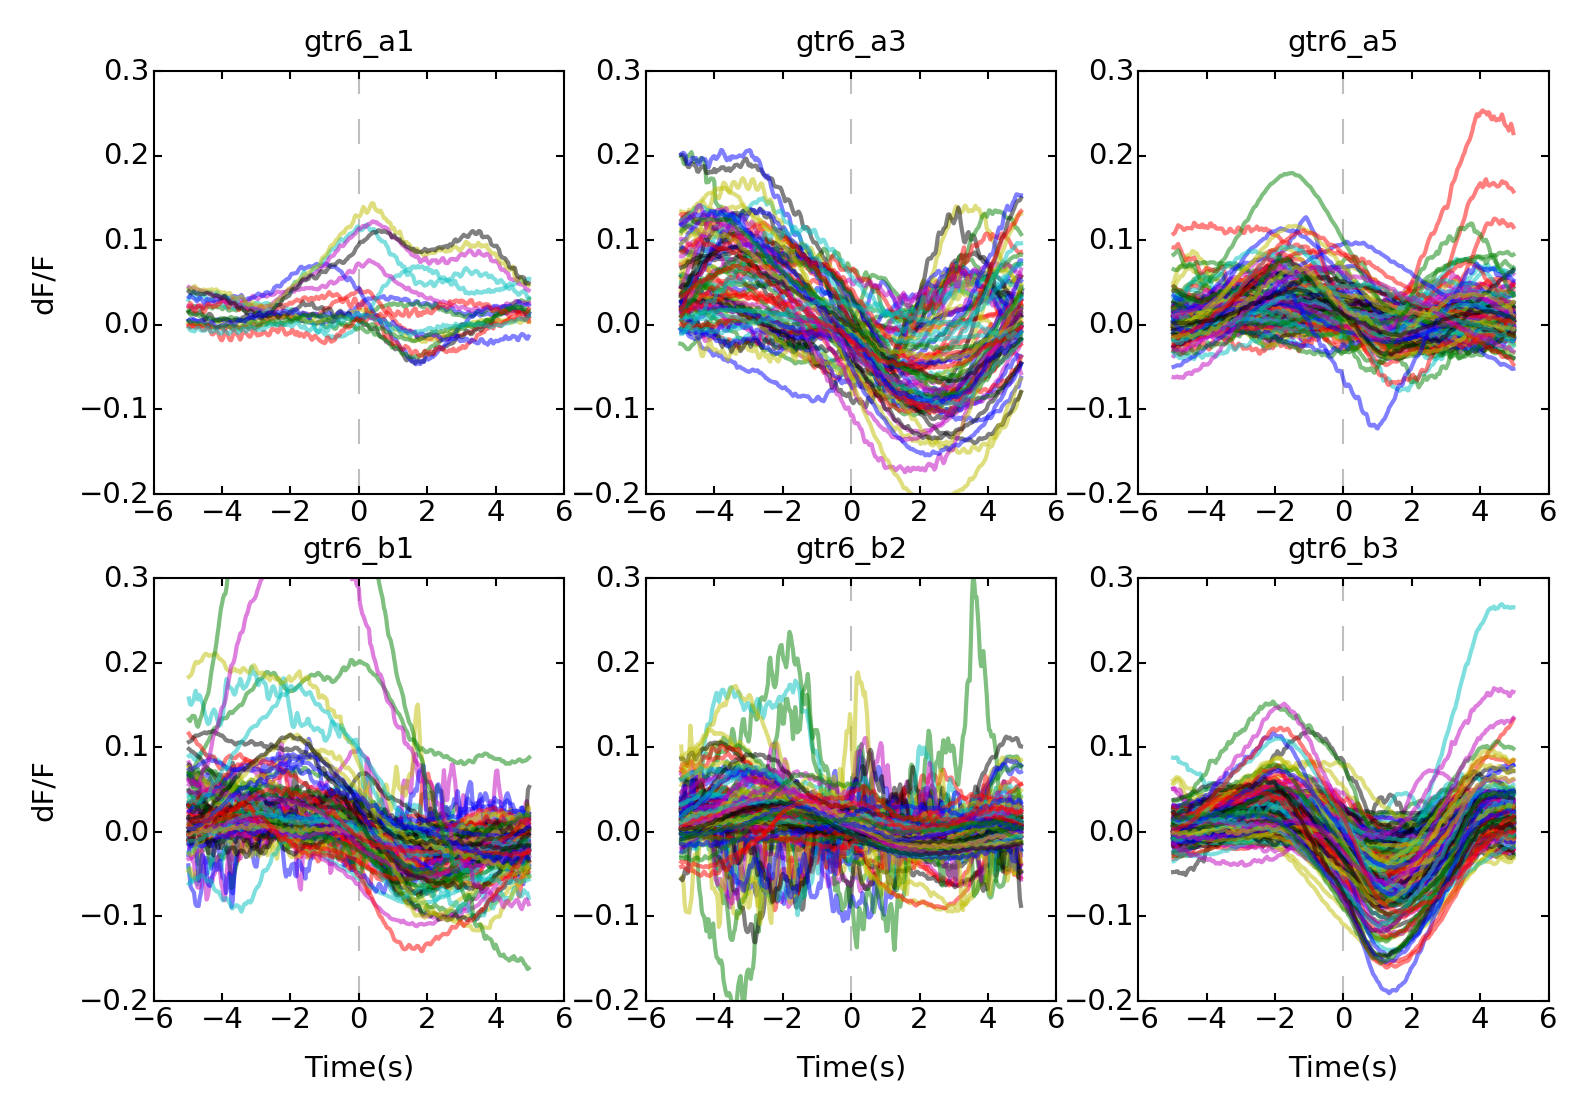

In [107]:
# pages = pdf.PdfPages("/data/gergely/Summaries/_raphe/reward/gtr6_cohort_PSTHs.pdf")
figure1 = pp.figure(dpi=300)

pp.subplot(231)
pp.ylim(-0.2, 0.3)
pp.ylabel("dF/F")
pp.title("gtr6_a1")
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
for time, trace in zip(gtr6_a1["time"],gtr6_a1["activityMean"]):
    pp.plot(time, trace, alpha=0.5)
        
pp.subplot(232)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.ylim(-0.2, 0.3)
pp.title("gtr6_a3")
for time, trace in zip(gtr6_a3["time"],gtr6_a3["activityMean"]):
    pp.plot(time, trace, alpha=0.5)
    
pp.subplot(233)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.title("gtr6_a5");
pp.ylim(-0.2, 0.3)
for time, trace in zip(gtr6_a5["time"],gtr6_a5["activityMean"]):
    pp.plot(time, trace, alpha=0.5)
    

pp.subplot(234)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.ylim(-0.2, 0.3)
pp.ylabel("dF/F")
pp.xlabel("Time(s)")
pp.title("gtr6_b1");
for time, trace in zip(gtr6_b1["time"],gtr6_b1["activityMean"]):
    pp.plot(time, trace, alpha=0.5)
    
    
pp.subplot(235)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.xlabel("Time(s)")
pp.title("gtr6_b2");
pp.ylim(-0.2, 0.3)
for time, trace in zip(gtr6_b2["time"],gtr6_b2["activityMean"]):
    pp.plot(time, trace, alpha=0.5)
    
pp.subplot(236)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.xlabel("Time(s)")
pp.title("gtr6_b3");
pp.ylim(-0.2, 0.3)
for time, trace in zip(gtr6_b3["time"],gtr6_b3["activityMean"]):
    pp.plot(time, trace, alpha=0.5)

figure1.savefig("/data/gergely/Summaries/_raphe/reward/gtr6_cohort_PSTHs.pdf")    
# pages.savefig(fig)
# pages.close()

In [121]:
import matplotlib.style
matplotlib.style.use('dark_background')

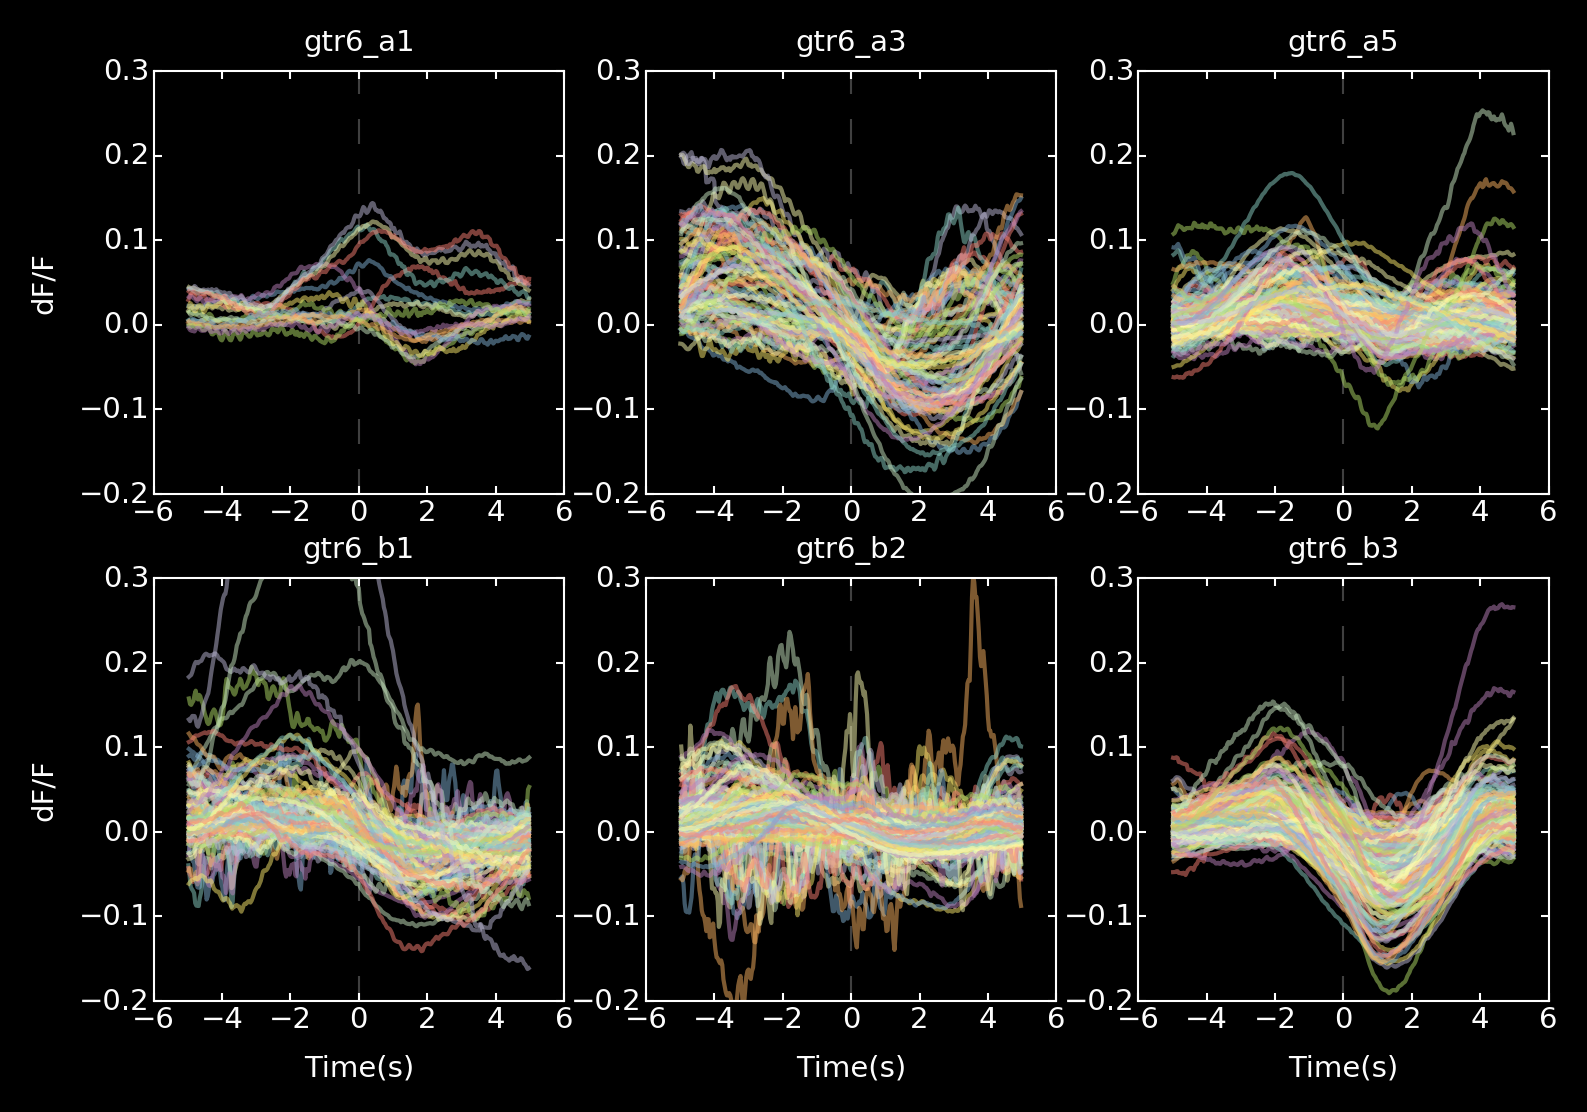

In [123]:
# for presentation on black background. Characters are white
# pages = pdf.PdfPages("/data/gergely/Summaries/_raphe/reward/gtr6_cohort_PSTHs.pdf")
figure1 = pp.figure(dpi=300)

ax = figure1.add_subplot(231)
ax.set_ylim(-0.2, 0.3)
ax.set_ylabel("dF/F",)
ax.set_title("gtr6_a1")
ax.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
for time, trace in zip(gtr6_a1["time"],gtr6_a1["activityMean"]):
    pp.plot(time, trace, alpha=0.5)
        
pp.subplot(232)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.ylim(-0.2, 0.3)
pp.title("gtr6_a3")
for time, trace in zip(gtr6_a3["time"],gtr6_a3["activityMean"]):
    pp.plot(time, trace, alpha=0.5)
    
pp.subplot(233)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.title("gtr6_a5");
pp.ylim(-0.2, 0.3)
for time, trace in zip(gtr6_a5["time"],gtr6_a5["activityMean"]):
    pp.plot(time, trace, alpha=0.5)
    

pp.subplot(234)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.ylim(-0.2, 0.3)
pp.ylabel("dF/F")
pp.xlabel("Time(s)")
pp.title("gtr6_b1");
for time, trace in zip(gtr6_b1["time"],gtr6_b1["activityMean"]):
    pp.plot(time, trace, alpha=0.5)
    
    
pp.subplot(235)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.xlabel("Time(s)")
pp.title("gtr6_b2");
pp.ylim(-0.2, 0.3)
for time, trace in zip(gtr6_b2["time"],gtr6_b2["activityMean"]):
    pp.plot(time, trace, alpha=0.5)
    
pp.subplot(236)
pp.axvline(linewidth=0.5, color="gray", linestyle="dashed", alpha=0.5)
pp.xlabel("Time(s)")
pp.title("gtr6_b3");
pp.ylim(-0.2, 0.3)
for time, trace in zip(gtr6_b3["time"],gtr6_b3["activityMean"]):
    pp.plot(time, trace, alpha=0.5)

figure1.savefig("/data/gergely/Summaries/_raphe/reward/gtr6_cohort_PSTHs_dark.pdf")    

In [110]:
ax.ylabel?

Object `ax.ylabel` not found.
